In [ ]:
import numpy as np
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/Oral_Dataset'
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_375_7183.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_403_7736.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_492_9380.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_607_5170.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_99_9672.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_57_2664.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_337_8390.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_55_1842.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_877_154.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_73_9454.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_73_5806.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_282_3649.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_8_9013.jpg
/content/drive/MyDrive/Oral_Dataset/train/Normal/aug_597_7609.jpg
/content/drive/MyDrive/Oral_Datas

In [ ]:

import os
import time
import shutil
import pathlib
import itertools


import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50

import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
tf.__version__

'2.19.0'

In [ ]:
train_data_path = '/content/drive/MyDrive/Oral_Dataset/train'
test_data_path  = '/content/drive/MyDrive/Oral_Dataset/test'
valid_data_path = '/content/drive/MyDrive/Oral_Dataset/val'

In [ ]:
labels = os.listdir(valid_data_path)

In [ ]:

data_path = '/content/data'


import os

if not os.path.exists(data_path):
    os.mkdir(data_path)
    print("Folder created successfully!")
else:
    print("Folder already exists!")


print("Current working data directory:", data_path)


Folder created successfully!
Current working data directory: /content/data


In [ ]:
normal_data_path = os.path.join(data_path, 'Normal')
oscc_data_path = os.path.join(data_path, 'OSCC')

if not os.path.exists(normal_data_path):
    os.mkdir(normal_data_path)
    print("Created Succesfulley!")
else:
    print("Folder already exist")

if not os.path.exists(oscc_data_path):
    os.mkdir(oscc_data_path)
    print("Created Succesfulley!")
else:
    print("Folder already exist")

Created Succesfulley!
Created Succesfulley!


In [ ]:
def move_data(d_path, saved_path):
    for i in labels:
        images = os.listdir(d_path + '/' + i)
        for j in images:
            path = d_path +'/' + i
            img = cv2.imread(path + '/' + j)
            s_path = saved_path + '/' + i + '/' + j
            cv2.imwrite(s_path, img)

In [ ]:
move_data(train_data_path, data_path)

In [ ]:
norm_path = len(os.listdir(data_path + '/' + labels[0]))
oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(norm_path+oscc_path)

4969


In [ ]:
move_data(test_data_path, data_path)

In [ ]:
norm_path = len(os.listdir(data_path + '/' + labels[0]))
oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(norm_path+oscc_path)

5095


In [ ]:
move_data(valid_data_path, data_path)

In [ ]:
norm_path = len(os.listdir(data_path + '/' + labels[0]))
oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(norm_path+oscc_path)

5215


In [ ]:
data_dir = '/content/data'
ds_name = 'Oral Cancer'

In [ ]:


def generate_data_paths(data_dir):

    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels


filepaths, labels = generate_data_paths(data_dir)


In [ ]:
def create_df(filepaths, labels):

    Fseries = pd.Series(filepaths, name= 'filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis= 1)
    return df

df = create_df(filepaths, labels)

In [ ]:
df.head()

,filepaths,labels
0,/content/data/OSCC/aug_61_5604.jpg,OSCC
1,/content/data/OSCC/OSCC_100x_148.jpg,OSCC
2,/content/data/OSCC/aug_518_9762.jpg,OSCC
3,/content/data/OSCC/aug_179_7137.jpg,OSCC
4,/content/data/OSCC/OSCC_400x_471.jpg,OSCC


In [ ]:
def num_of_examples(df, name='df'):
    print(f"The {name} dataset has {df.shape[0]} images.")

num_of_examples(df, ds_name)

The Oral Cancer dataset has 5215 images.


In [ ]:
def num_of_classes(df, name='df'):
    print(f"The {name} dataset has {len(df['labels'].unique())} classes")

num_of_classes(df, ds_name)


The Oral Cancer dataset has 2 classes


In [ ]:
def classes_count(df, name='df'):

    print(f"The {name} dataset has: ")
    print("="*70)
    print()
    for name in df['labels'].unique():
        num_class = len(df['labels'][df['labels'] == name])
        print(f"Class '{name}' has {num_class} images")
        print('-'*70)

classes_count(df, ds_name)

The Oral Cancer dataset has: 

Class 'OSCC' has 2698 images
----------------------------------------------------------------------
Class 'Normal' has 2517 images
----------------------------------------------------------------------


In [ ]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

cat_summary_with_graph(df,'labels')


In [ ]:
def check_null_values(df, name='df'):

    num_null_vals = sum(df.isnull().sum().values)

    if not num_null_vals:
        print(f"The {name} dataset has no null values")

    else:
        print(f"The {name} dataset has {num_null_vals} null values")
        print('-'*70)
        print('Total null values in each column:\n')
        print(df.isnull().sum())


check_null_values(df, ds_name)

The Oral Cancer dataset has no null values


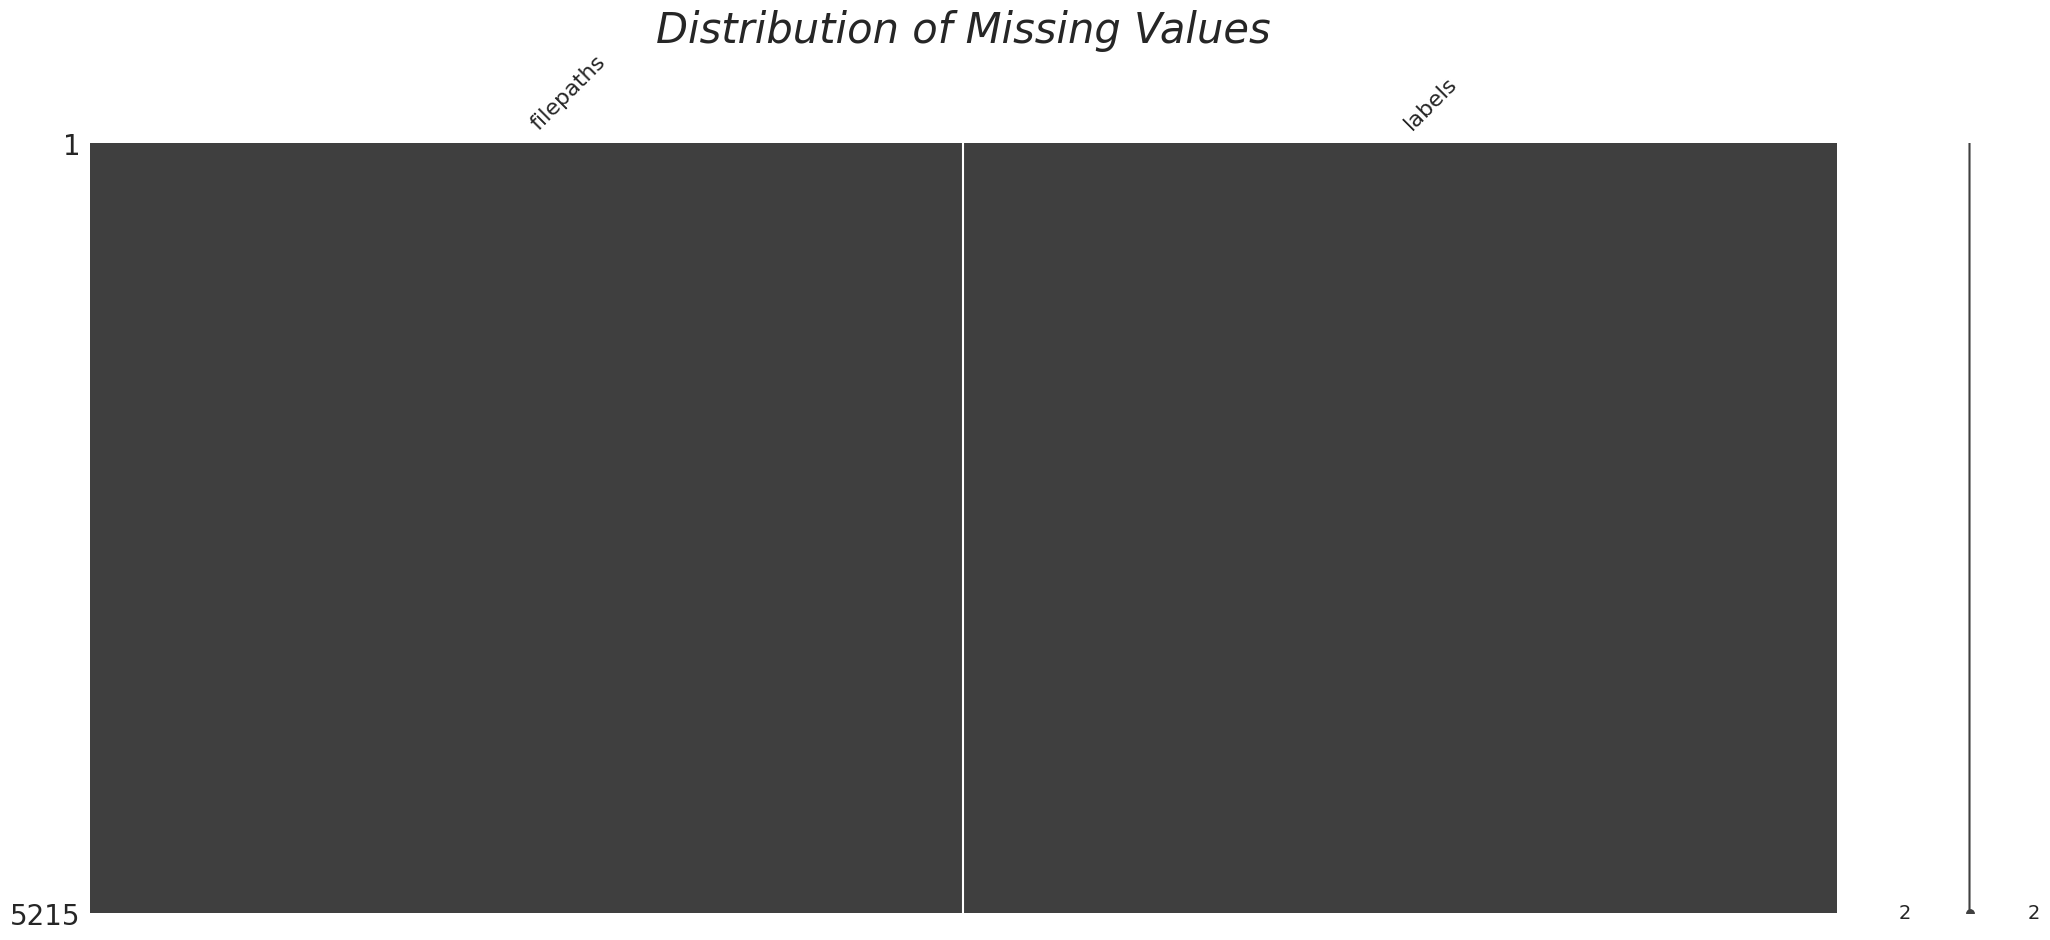

In [ ]:
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');


In [ ]:

train_df, dummy_df = train_test_split(df,  train_size= 0.7, shuffle= True, random_state= 123)


valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [ ]:
num_of_classes(train_df, "Training "+ds_name)
num_of_classes(valid_df, "Validation "+ds_name)
num_of_classes(test_df, "Testing "+ds_name)

The Training Oral Cancer dataset has 2 classes
The Validation Oral Cancer dataset has 2 classes
The Testing Oral Cancer dataset has 2 classes


In [ ]:
classes_count(train_df, 'Training '+ds_name)

The Training Oral Cancer dataset has: 

Class 'Normal' has 1749 images
----------------------------------------------------------------------
Class 'OSCC' has 1901 images
----------------------------------------------------------------------


In [ ]:
classes_count(valid_df, 'Validation '+ds_name)

The Validation Oral Cancer dataset has: 

Class 'OSCC' has 388 images
----------------------------------------------------------------------
Class 'Normal' has 394 images
----------------------------------------------------------------------


In [ ]:
classes_count(test_df, 'Testing '+ds_name)

The Testing Oral Cancer dataset has: 

Class 'Normal' has 374 images
----------------------------------------------------------------------
Class 'OSCC' has 409 images
----------------------------------------------------------------------


In [ ]:

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size


def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                           horizontal_flip=True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe(train_df,
                                       x_col= 'filepaths',
                                       y_col= 'labels',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode= 'rgb',
                                       shuffle= True,
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df,
                                       x_col= 'filepaths',
                                       y_col= 'labels',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode= 'rgb',
                                       shuffle= True,
                                       batch_size= batch_size)


test_gen = ts_gen.flow_from_dataframe(test_df,
                                      x_col= 'filepaths',
                                      y_col= 'labels',
                                      target_size= img_size,
                                      class_mode= 'categorical',
                                      color_mode= 'rgb',
                                      shuffle= False,
                                      batch_size= test_batch_size)

Found 3650 validated image filenames belonging to 2 classes.
Found 782 validated image filenames belonging to 2 classes.
Found 783 validated image filenames belonging to 2 classes.


In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):

    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')

plt.show()

# Defining the Model Structure

In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False, weights = "imagenet", input_shape = img_shape, pooling = 'max')

efficientNet_model = Sequential([
    base_model,
    BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(0.016), activity_regularizer = regularizers.l1(0.006), bias_regularizer = regularizers.l1(0.006), activation = 'relu'),
    Dropout(rate = 0.3, seed = 123),
    Dense(class_count, activation = 'softmax')
])

efficientNet_model.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

efficientNet_model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 1536)           │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1536)           │         6,144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,183,665 (42.66 MB)

 Trainable params: 11,093,290 (42.32 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [ ]:
early_stopping = EarlyStopping(monitor = "val_loss",
                               patience = 10,
                               restore_best_weights = True,
                               mode = 'min',
                               )

In [ ]:


batch_size = 128



epochs = 50

history = efficientNet_model.fit(
    x = train_gen,
    epochs = epochs,
    verbose = 1,
    validation_data = valid_gen,
    validation_steps = None,
    shuffle = False,
    batch_size = batch_size
)

Epoch 1/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 268s 609ms/step - accuracy: 0.6019 - loss: 11.4748 - val_accuracy: 0.5038 - val_loss: 5.7137
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 44s 192ms/step - accuracy: 0.5285 - loss: 5.0503 - val_accuracy: 0.5038 - val_loss: 4.0437
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 44s 191ms/step - accuracy: 0.5127 - loss: 3.6874 - val_accuracy: 0.4949 - val_loss: 2.9287
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 43s 189ms/step - accuracy: 0.5153 - loss: 2.7144 - val_accuracy: 0.4962 - val_loss: 2.1864
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 45s 195ms/step - accuracy: 0.5193 - loss: 2.0481 - val_accuracy: 0.4910 - val_loss: 1.7582
Epoch 6/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 81s 192ms/step - accuracy: 0.5040 - loss: 1.5988 - val_accuracy: 0.4962 - val_loss: 1.3754
Epoch 7/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 44s 193ms/step - accuracy: 0.5275 - loss: 1.2983 - val_accuracy: 0.4974 - val_loss: 1.1635
Epoch 8/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 44s 190ms/step - accuracy: 0.5195 - loss:

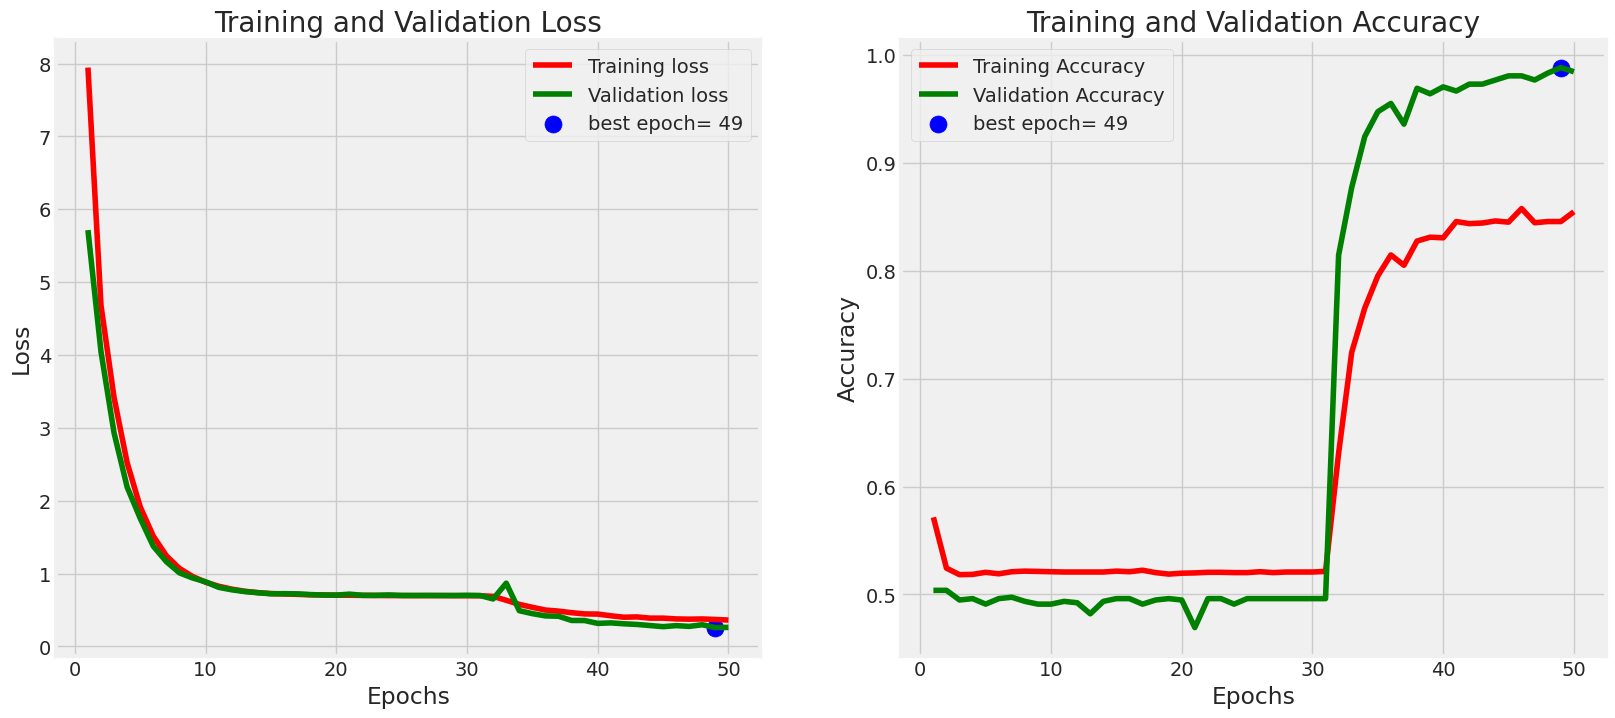

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = efficientNet_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = efficientNet_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = efficientNet_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9952 - loss: 0.2426
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9914 - loss: 0.2535
27/27 ━━━━━━━━━━━━━━━━━━━━ 27s 297ms/step - accuracy: 0.9693 - loss: 0.3476
Train Loss:  0.2395276129245758
Train Accuracy:  0.9953703880310059
--------------------
Validation Loss:  0.2531245946884155
Validation Accuracy:  0.9884259104728699
--------------------
Test Loss:  0.35343462228775024
Test Accuracy:  0.9629629850387573


In [ ]:
preds = efficientNet_model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 256ms/step


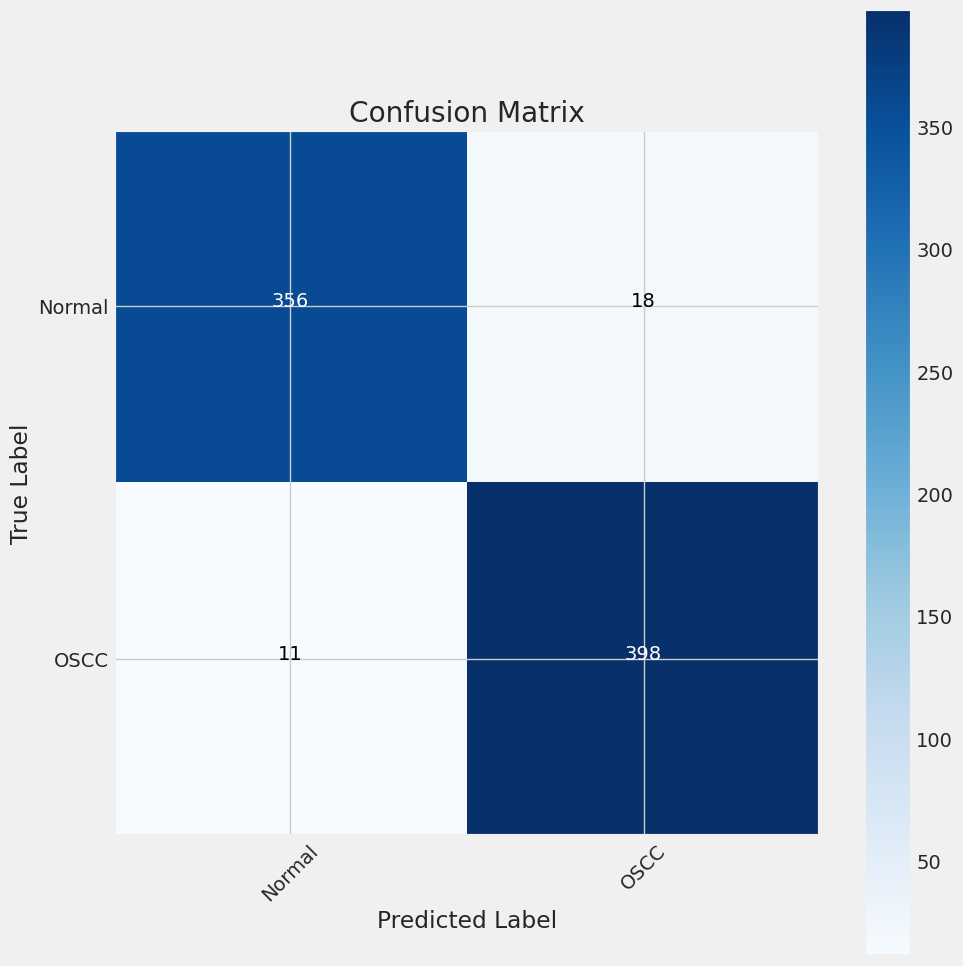

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      Normal       0.97      0.95      0.96       374
        OSCC       0.96      0.97      0.96       409

    accuracy                           0.96       783
   macro avg       0.96      0.96      0.96       783
weighted avg       0.96      0.96      0.96       783



In [ ]:
efficientNet_model.save('my_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step


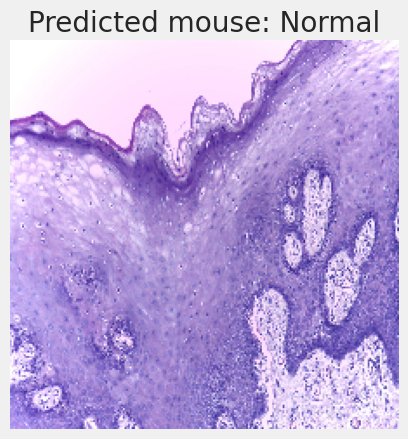

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model, class_labels):

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    predicted_class_label = class_labels[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted mouse: {predicted_class_label}")
    plt.show()

# Load your trained model
efficientNet_model.load_weights('/content/my_model.h5')

# Define your class labels (e.g., ['car', 'truck', ...])
class_labels = ['Normal', 'Oral Cancer']

# Replace 'path_to_test_image' with the path to the image you want to test
image_path_to_test = '/content/data/Normal/Normal_100x_1.jpg'
predict_and_display(image_path_to_test, efficientNet_model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


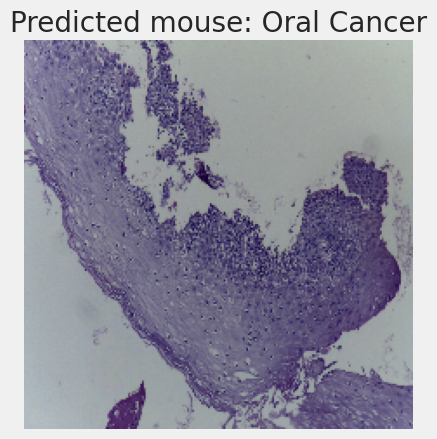

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model, class_labels):

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    predicted_class_label = class_labels[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted mouse: {predicted_class_label}")
    plt.show()

# Load your trained model
efficientNet_model.load_weights('/content/my_model.h5')

# Define your class labels (e.g., ['car', 'truck', ...])
class_labels = ['Normal', 'Oral Cancer']

# Replace 'path_to_test_image' with the path to the image you want to test
image_path_to_test = '/content/data/OSCC/OSCC_100x_100.jpg'
predict_and_display(image_path_to_test, efficientNet_model, class_labels)